In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import data and clean up dataframe
death_data_df = pd.read_csv('../Resources/Accidental_Drug_Related_Deaths_2012-2017_cleaned.csv')
death_data_df = death_data_df.dropna(subset=["Age"])
death_data_df.fillna(0, inplace=True)
mapping = {'Y': 1, 'y': 1}
death_data_df = death_data_df.replace({'Heroin': mapping, 'Cocaine': mapping, 'Fentanyl': mapping, 'Oxycodone': mapping,
       'Oxymorphone': mapping, 'EtOH': mapping, 'Hydrocodone': mapping, 'Benzodiazepine': mapping, 'Methadone': mapping,
       'Amphet': mapping, 'Tramad': mapping, 'Morphine (not heroin)': mapping, 'Other': mapping, 'Any Opioid': mapping})
death_data_df = death_data_df[death_data_df.Year >= 2012]
death_data_df[['Heroin', 'Cocaine', 'Fentanyl', 'Oxycodone','Oxymorphone', 'EtOH', 'Hydrocodone', 'Benzodiazepine', \
               'Methadone', 'Amphet', 'Tramad', 'Morphine (not heroin)']]=death_data_df[['Heroin', 'Cocaine', 'Fentanyl', \
                'Oxycodone', 'Oxymorphone', 'EtOH', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad', \
                'Morphine (not heroin)']].apply(pd.to_numeric, errors='coerce')

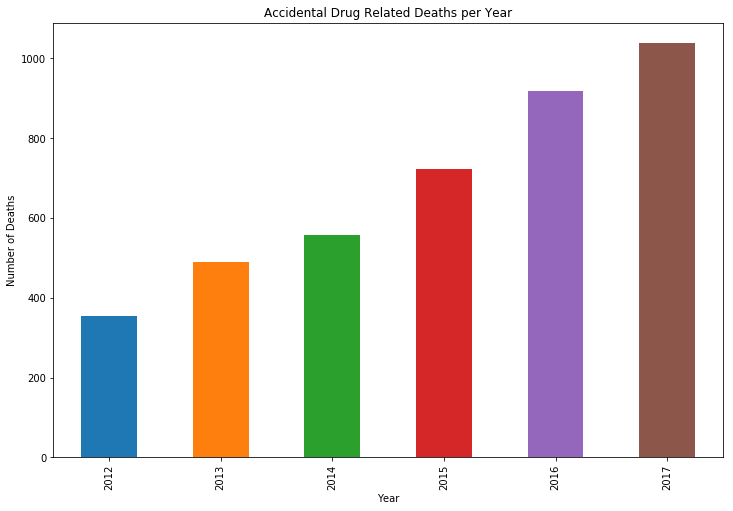

In [3]:
# Graph deaths by year
by_year = death_data_df.groupby(['Year'])
by_year = by_year['CaseNumber'].count()
by_year.plot(kind='bar', figsize=(12,8))
plt.title("Accidental Drug Related Deaths per Year")
plt.ylabel("Number of Deaths")
plt.savefig("DeathsPerYear.png")
plt.show()

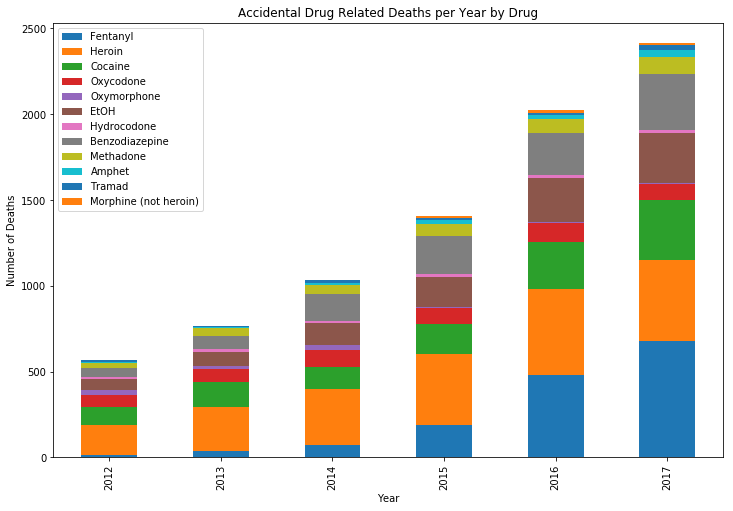

In [16]:
# Deaths by drug
deaths_by_drug = death_data_df.groupby('Year').agg({'Fentanyl': sum, 'Heroin':sum, 'Cocaine':sum, 'Oxycodone': sum, \
                                                    'Oxymorphone': sum, 'EtOH': sum, 'Hydrocodone': sum, 'Benzodiazepine': sum, \
                                                    'Methadone': sum, 'Amphet': sum, 'Tramad': sum, 'Morphine (not heroin)': sum})
deaths_by_drug.plot(kind='bar', figsize=(12,8), stacked=True)
plt.title("Accidental Drug Related Deaths per Year by Drug")
plt.ylabel("Number of Deaths")
plt.savefig("../Output/DeathsByDrug.png")
plt.show()

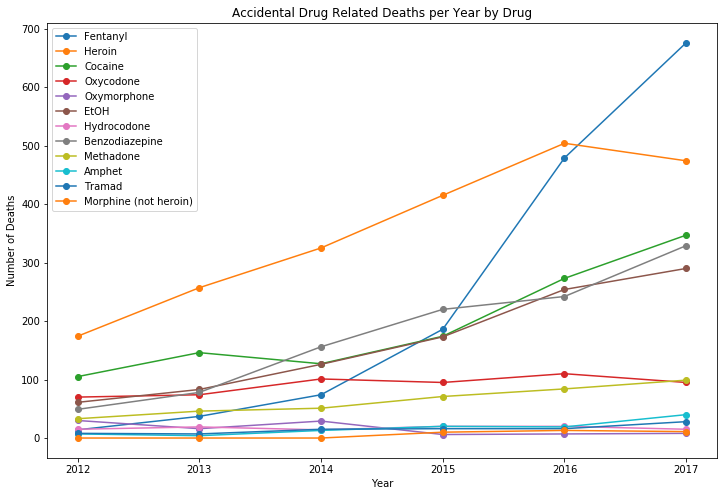

In [13]:
deaths_by_drug.plot(kind='line', figsize=(12,8), marker='o')
plt.title("Accidental Drug Related Deaths per Year by Drug")
plt.ylabel("Number of Deaths")
plt.savefig("../Output/DeathsByDrug_line.png")
plt.show()

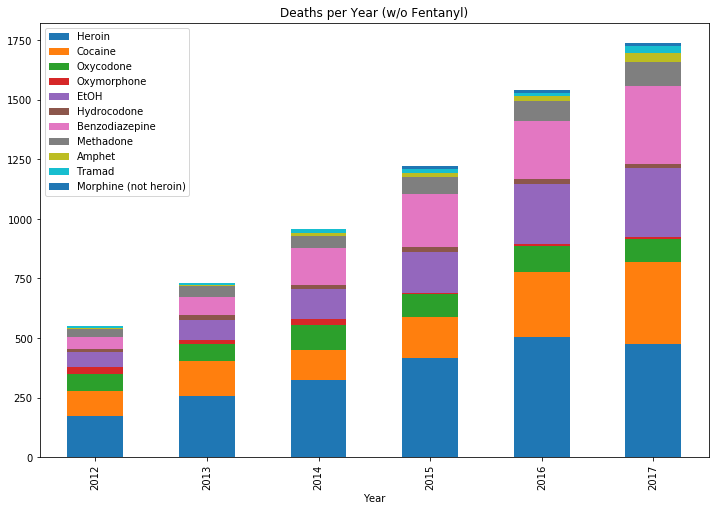

In [5]:
by_year_no_fentanyl = deaths_by_drug.drop(columns='Fentanyl')
by_year_no_fentanyl.plot(kind='bar', figsize=(12,8), stacked=True)
plt.title("Deaths per Year (w/o Fentanyl)")
plt.show()

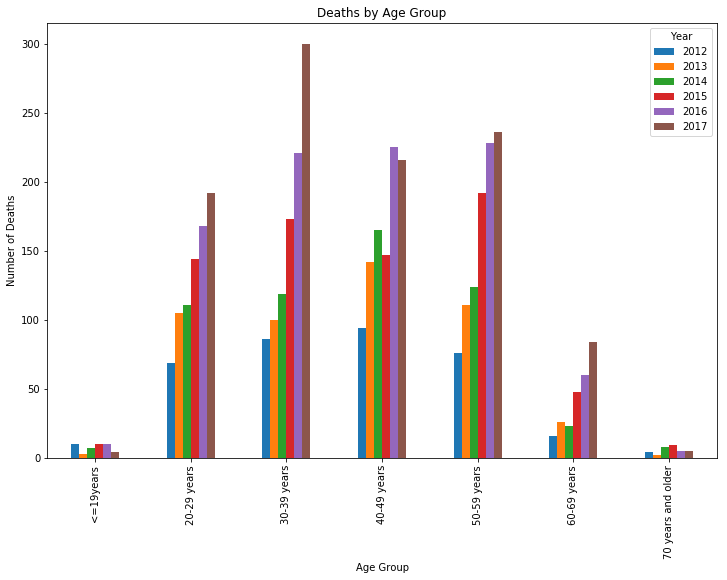

In [6]:
# Group data by age group

# Create bins for age groups
bins = [0,19, 29,39,49,59,69,120]

# Create labels for the bins
ages = ["<=19years","20-29 years","30-39 years","40-49 years","50-59 years","60-69 years","70 years and older"]

# Slice the data and place it into bins
rank = pd.cut(death_data_df["Age"], bins, labels=ages)

# Add column to main dataframe
death_data_df["Age Group"] = rank

# Group by year and age group for graphing
by_year_age_group = death_data_df.groupby(['Year', 'Age Group'])
by_year_age_group = by_year_age_group["CaseNumber"].count()

# Create bar chart
by_year_age_group.unstack(level=0).plot(kind='bar', figsize=(12,8))
plt.title("Deaths by Age Group")
plt.ylabel("Number of Deaths")
plt.savefig("../Output/DeathsByAgeGroup.png")
plt.show()

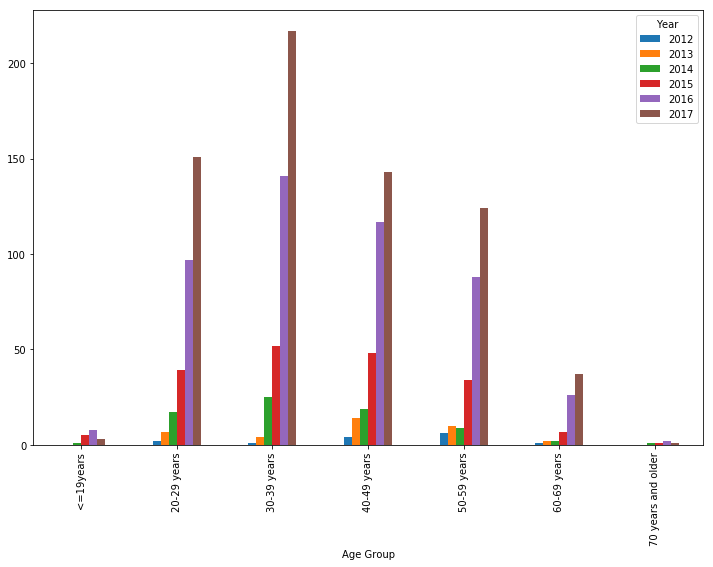

In [7]:
fentanyl_by_year_age_group = death_data_df.groupby(['Year', 'Age Group'])['Fentanyl'].sum()
fentanyl_by_year_age_group.unstack(level=0).plot(kind='bar', figsize=(12,8))
plt.show()

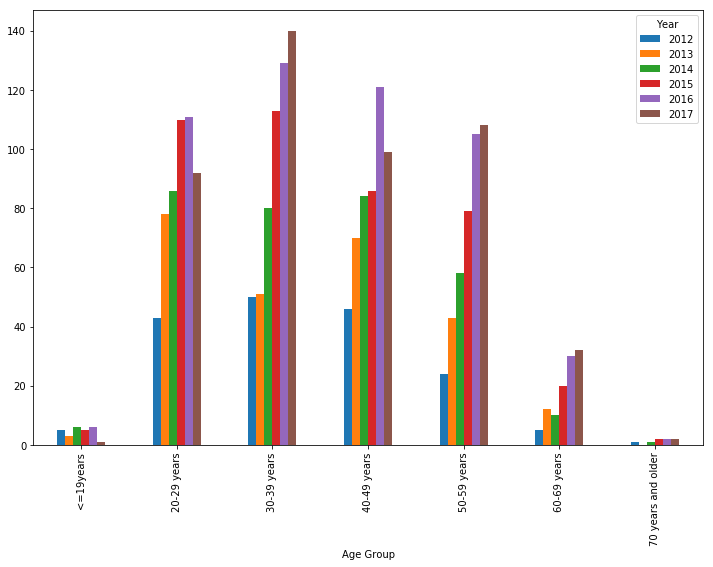

In [8]:
heroin_by_year_age_group = death_data_df.groupby(['Year', 'Age Group'])['Heroin'].sum()
heroin_by_year_age_group.unstack(level=0).plot(kind='bar', figsize=(12,8))
plt.show()

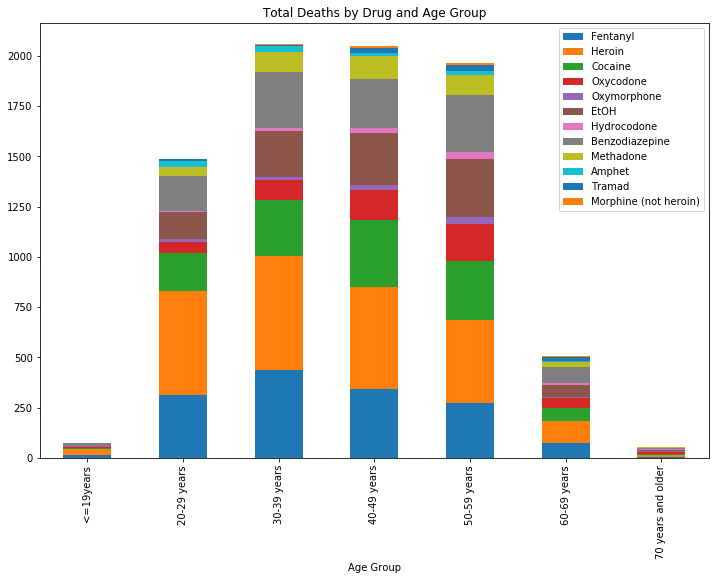

In [9]:
drug_age_group = death_data_df.groupby('Age Group').agg({'Fentanyl': sum, 'Heroin':sum, 'Cocaine':sum, 'Oxycodone': sum, \
                                                    'Oxymorphone': sum, 'EtOH': sum, 'Hydrocodone': sum, 'Benzodiazepine': sum, \
                                                    'Methadone': sum, 'Amphet': sum, 'Tramad': sum, 'Morphine (not heroin)': sum})
drug_age_group.plot(kind='bar', figsize=(12,8), stacked=True)
plt.title("Total Deaths by Drug and Age Group")
plt.show()